# **Residential Building Price Prediction**

Data set includes construction cost, sale prices, project variables, and economic variables corresponding to real estate single-family residential apartments in Tehran, Iran.

Source : https://archive.ics.uci.edu/ml/datasets/Residential+Building+Data+Set#

#BLUF

* A regressor horse race was staged, which was won by the AdaBoostRegressor.
* The AdaBoostRegressor was tuned, yielding an average MSE of 0.48. 42.66% of the predictions of helpful votes are overpredicted.

#**Business Problem**
Using the data, available here, predict the target variable **V-9** - actual sales prices of residential building

#**Data Dictionary**
The features for the dataset are as follows:

**V-1** Project locality defined in terms of zip codes

**V-2** Total floor area of the building

**V-3** Lot area

**V-4** Total preliminary estimated construction cost based on the prices at the beginning of the project

**V-5** Preliminary estimated construction cost based on the prices at the beginning of the project

**V-6** Equivalent preliminary estimated construction cost based on the prices at the beginning of the project in a selected base year 

**V-7** Duration of construction

**V-8** Price of the unit at the beginning of the project per m2

**V-9** Actual sales prices (output)

**V-10** Actual construction costs (output) 

**V-11** The number of building permits issued

**V-12** Building services index (BSI) b for a preselected base year

**V-13** Wholesale price index (WPI) c of building materials for the base year

**V-14** Total floor areas of building permits issued by the city/municipality

**V-15** Cumulative liquidity 

**V-16** Private sector investment in new buildings 

**V-17** Land price index for the base year

**V-18** The number of loans extended by banks in a time resolution

**V-19** The amount of loans extended by banks in a time resolution

**V-20** The interest rate for loan in a time resolution

**V-21** The average construction cost of buildings by private sector at the time of completion of construction 

**V-22** The average of construction cost of buildings by private sector at the beginning of the construction 

**V-23** Official exchange rate with respect to dollars 

**V-24** Nonofficial (street market) exchange rate with respect to dollars

**V-25** Consumer price index (CPI) i in the base year

**V-26** CPI of housing, water, fuel & power in the base year

**V-27** Stock market index

**V-28** Population of the city

**V-29** Gold price per ounce

#**Instruction**

Download the dataset from https://drive.google.com/drive/folders/1mJfEbGI6mfosNcEeuUpCsfQJhThBgF84?usp=sharing

Using the data, and code from the M5 regression Python notebooks, and other resources, as appropriate:

· Formulate a business problem that can be solved by regressors, identify appropriate metrics to evaluate the suitability of a regressor solution for the business problem, stage a horse race of regressors for the business problem, documenting your results, and determine if the regression results offer an appropriate solution to the business problem.

· Summarize your findings and an action items in a few sentences at the end of the notebook (in a section titled “Conclusion”). Be sure to offer the Bottom Line Up Front (BLUF) at the start of the Conclusion.

· Submit your notebook file on Blackboard, double checking that you have submitted the correct file.

#**Libraries**

In [ ]:
# Basic Libraries
import pandas as pd
import seaborn as sns

import numpy as np
from numpy import mean
from numpy import std

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.stats.mstats import winsorize
import scipy.stats as ss
import math
import seaborn as sns
from datetime import datetime
from numpy import absolute

In [ ]:
# sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:
# sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [ ]:
# Keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
from xgboost import XGBRegressor
import lightgbm as lgb

#**Read Data**

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read 
file_ = "/content/drive/MyDrive/Colab Notebooks/Residential Building.csv"   # adapt this as needed to the file structure on your Google drive
df = pd.read_csv(file_) # read in csv file
df = pd.DataFrame(df.drop(['V-8'],axis=1))

#**EDA**

In [ ]:
# print first 5 rows of dataframe 
df.head()

,V-1,V-2,V-3,V-4,V-5,V-6,V-7,V-11,V-12,V-13,V-14,V-15,V-16,V-17,V-18,V-19,V-20,V-21,V-22,V-23,V-24,V-25,V-26,V-27,V-28,V-29,V-9,V-10
0,1.0,3150.0,920.0,598.5,190.0,1010.84,16.0,7196.0,51.3,56.13,5.97,249110.70,2562.3,52.80,217.00,10445.6,15,733.800000,815.50,1755.00,8002.0,60.74,54.26,2978.26,41407.0,601988.1,2200.0,410.0
1,1.0,7600.0,1140.0,3040.0,400.0,963.81,23.0,3678.0,86.2,83.21,3.25,526596.40,2790.6,94.10,334.80,14488.6,15,1143.800000,1316.30,8364.78,8393.0,90.95,89.79,11379.37,44835.0,929027.1,5000.0,1000.0
2,1.0,4800.0,840.0,480.0,100.0,689.84,15.0,2693.0,36.2,37.64,1.55,134312.50,1529.0,31.43,175.70,3994.7,15,589.500000,765.80,1755.00,4930.0,38.70,32.04,1653.06,37933.0,377828.6,1200.0,170.0
3,1.0,685.0,202.0,13.7,20.0,459.54,4.0,1381.0,10.0,3.91,3.00,27231.21,316.5,9.85,14.15,152.6,12,197.679557,152.25,1442.31,1456.0,9.73,8.34,686.16,8194.0,122031.7,165.0,30.0
4,1.0,3000.0,800.0,1230.0,410.0,631.91,13.0,5606.0,149.1,134.80,4.09,1284199.40,6622.5,147.60,432.40,73143.5,14,2220.600000,2244.10,9231.76,9286.0,136.60,140.20,9821.00,48260.0,1734973.5,5500.0,700.0


In [ ]:
# Shape of df
print("Shape", df.shape)

# Check data types
print(df.info())

Shape (372, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V-1     372 non-null    float64
 1   V-2     372 non-null    float64
 2   V-3     372 non-null    float64
 3   V-4     372 non-null    float64
 4   V-5     372 non-null    float64
 5   V-6     372 non-null    float64
 6   V-7     372 non-null    float64
 7   V-11    372 non-null    float64
 8   V-12    372 non-null    float64
 9   V-13    372 non-null    float64
 10  V-14    372 non-null    float64
 11  V-15    372 non-null    float64
 12  V-16    372 non-null    float64
 13  V-17    372 non-null    float64
 14  V-18    372 non-null    float64
 15  V-19    372 non-null    float64
 16  V-20    372 non-null    int64  
 17  V-21    372 non-null    float64
 18  V-22    372 non-null    float64
 19  V-23    372 non-null    float64
 20  V-24    372 non-null    float64
 21  V-25    372 non-null   

In [ ]:
# Describe Dataset 
print("\n DESCRIBE\n",df.describe())


 DESCRIBE
               V-1           V-2  ...          V-9         V-10
count  372.000000    372.000000  ...   372.000000   372.000000
mean     9.728495   1729.044355  ...  1387.432796   232.647849
std      6.563309   1802.371491  ...  1206.083047   162.627656
min      1.000000    200.000000  ...    50.000000    20.000000
25%      4.000000    720.000000  ...   577.500000   110.000000
50%      8.000000   1220.000000  ...  1000.000000   190.000000
75%     17.000000   2100.000000  ...  1700.000000   330.000000
max     20.000000  15670.000000  ...  6800.000000  1000.000000

[8 rows x 28 columns]


In [ ]:
# Check Skewness
print("\n SKEWNESS\n",df.skew())


 SKEWNESS
 V-1     0.249882
V-2     3.989896
V-3     5.669416
V-4     6.505527
V-5     1.138997
V-6     4.602809
V-7     2.441006
V-11    0.808412
V-12    0.779815
V-13    0.467698
V-14    0.856158
V-15    0.958638
V-16    1.780164
V-17    1.198957
V-18    0.744199
V-19    1.877874
V-20   -2.230610
V-21    0.727993
V-22    0.846378
V-23   -0.058882
V-24   -1.338441
V-25    0.195724
V-26    0.308292
V-27    0.246241
V-28    0.072674
V-29    0.803346
V-9     1.877488
V-10    1.260767
dtype: float64


In [ ]:
# Check kurtosis
print("\n kurtosis\n",df.kurtosis())


 kurtosis
 V-1     -1.444537
V-2     23.177713
V-3     43.677657
V-4     64.718383
V-5      1.497204
V-6     40.590268
V-7     13.087771
V-11    -0.443658
V-12     0.120824
V-13    -0.106198
V-14     0.347675
V-15    -0.089288
V-16     6.082211
V-17     2.494512
V-18    -0.434420
V-19     2.740314
V-20     4.057262
V-21    -0.166095
V-22     0.362569
V-23    -1.971188
V-24     0.510987
V-25    -0.864406
V-26    -0.900772
V-27    -1.558699
V-28    -1.424656
V-29    -0.230428
V-9      3.750821
V-10     2.194594
dtype: float64


CORRELATION MATRIX
            V-1       V-2       V-3  ...      V-29       V-9      V-10
V-1   1.000000 -0.229467 -0.138081  ...  0.122142 -0.435081 -0.298949
V-2  -0.229467  1.000000  0.946542  ...  0.087300  0.254336  0.253317
V-3  -0.138081  0.946542  1.000000  ...  0.080682  0.163545  0.165161
V-4  -0.286906  0.769473  0.639202  ...  0.335104  0.512995  0.602107
V-5  -0.313596  0.226597  0.154383  ...  0.791587  0.784986  0.963322
V-6  -0.618159  0.211963  0.132141  ... -0.178923  0.192130  0.308446
V-7   0.001739  0.142538  0.077268  ...  0.018532  0.139202  0.281069
V-11  0.007896 -0.017714  0.000317  ...  0.335556  0.209280  0.264959
V-12  0.125212  0.095118  0.086580  ...  0.982780  0.598737  0.769118
V-13  0.128299  0.093517  0.080102  ...  0.971176  0.606079  0.771490
V-14 -0.028722 -0.016744  0.001973  ...  0.338486  0.215884  0.272395
V-15  0.128815  0.086655  0.081493  ...  0.983300  0.587638  0.758680
V-16  0.103847  0.101956  0.099922  ...  0.871027  0.493197  0.675930


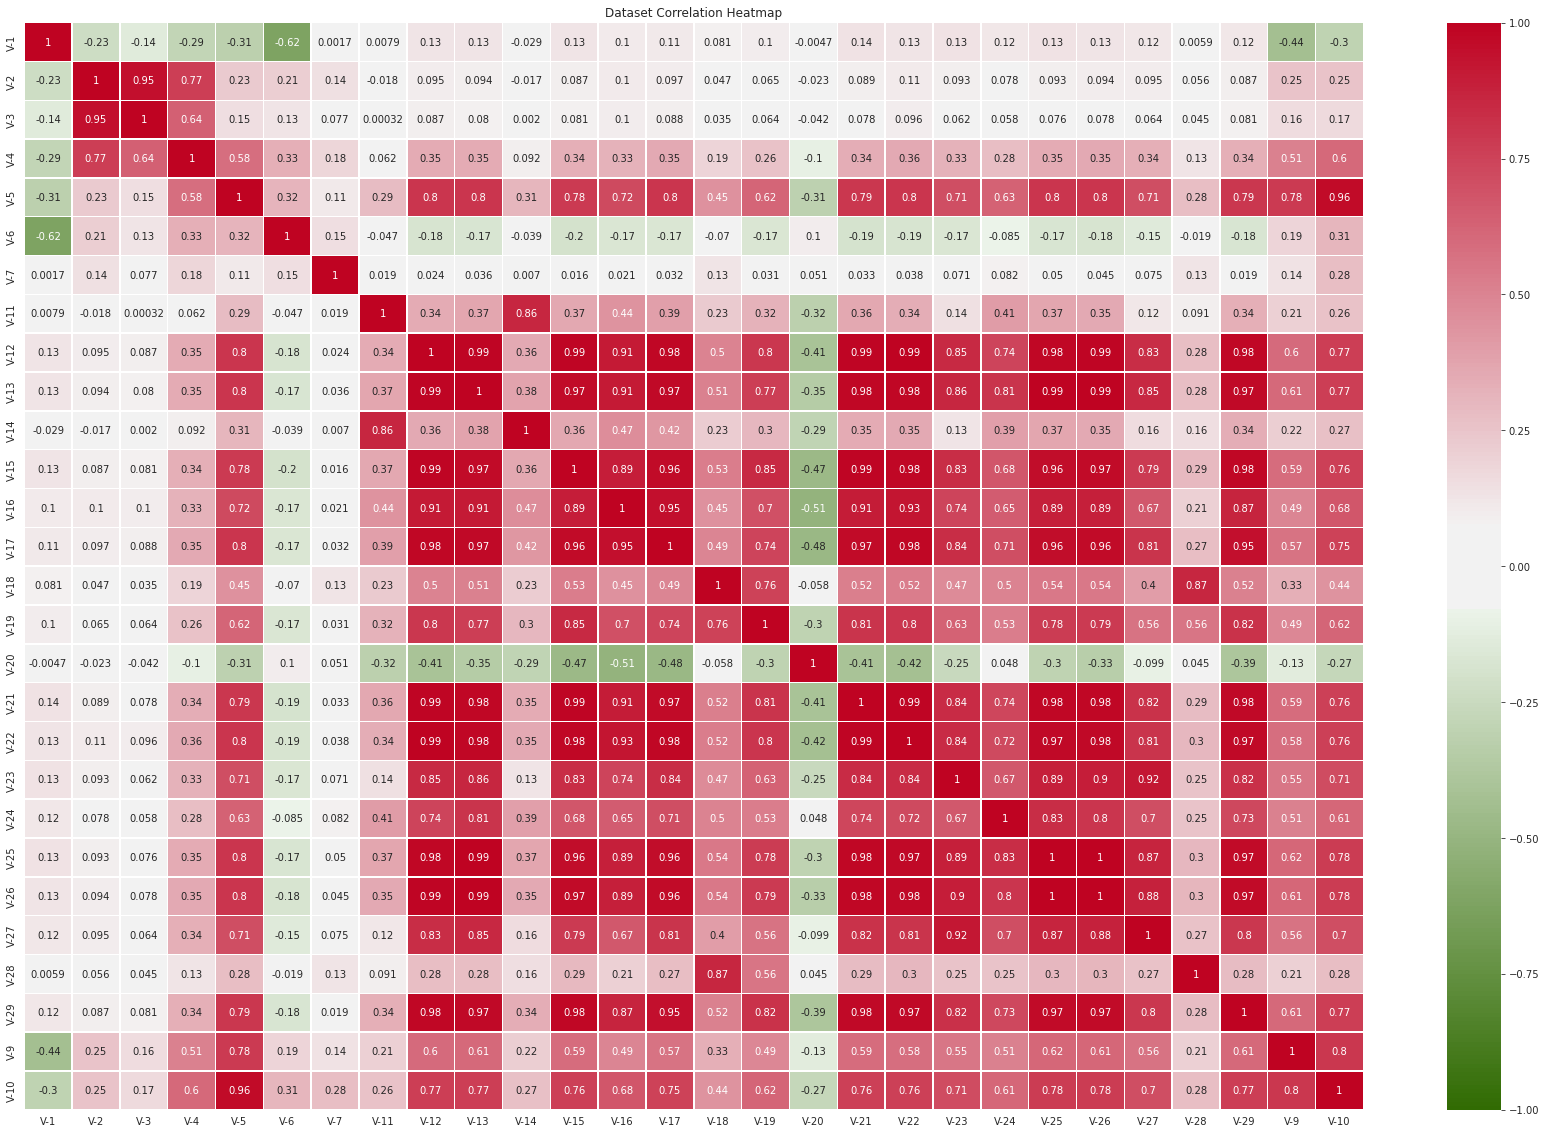



COVARIANCE MATRIX
                 V-1           V-2  ...           V-9          V-10
V-1       43.077030 -2.714491e+03  ... -3.444055e+03 -3.190905e+02
V-2    -2714.490620  3.248543e+06  ...  5.528775e+05  7.425123e+04
V-3     -444.140057  8.360807e+05  ...  9.666675e+04  1.316335e+04
V-4    -1061.184386  7.815665e+05  ...  3.486729e+05  5.518185e+04
V-5     -231.765644  4.598897e+04  ...  1.066091e+05  1.764091e+04
V-6    -1116.150529  1.051002e+05  ...  6.374900e+04  1.379984e+04
V-7        0.023933  5.386041e+02  ...  3.519788e+02  9.582982e+01
V-11      81.485692 -5.019834e+04  ...  3.968548e+05  6.774851e+04
V-12      39.446573  8.229015e+03  ...  3.466212e+04  6.003841e+03
V-13      33.999022  6.805428e+03  ...  2.951378e+04  5.065750e+03
V-14      -0.245874 -3.936188e+01  ...  3.396094e+02  5.777977e+01
V-15  357199.967601  6.598699e+07  ...  2.994384e+08  5.212834e+07
V-16    1814.087776  4.890980e+05  ...  1.583210e+06  2.925747e+05
V-17      36.415741  8.768375e+03  ...  3

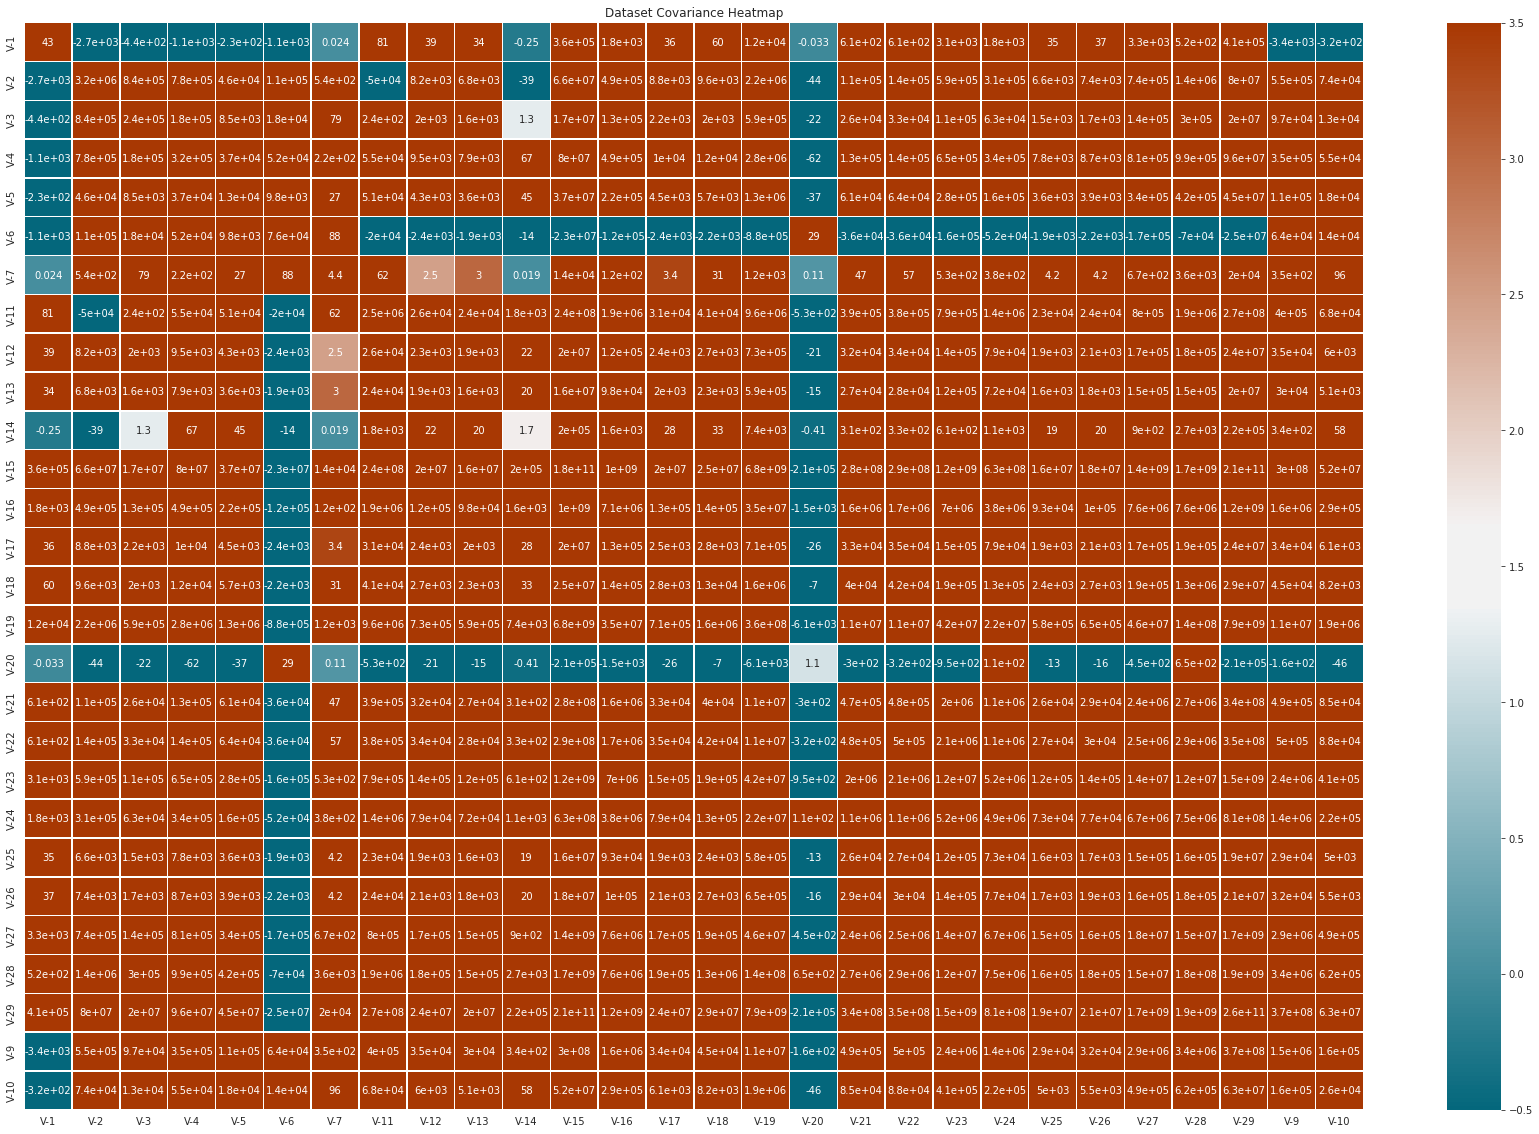

In [ ]:
# Multivariate numerical descriptive statistics

#Correlation Matrix
print("CORRELATION MATRIX\n",df.corr())
print("\n\n")

#Correlation Matrix as a Heatmap
sns.set_style('darkgrid')
plt.figure(figsize = (30,20))
cmap = sns.diverging_palette(120, 10, l = 40, s = 99, sep = 20, center = 'light', as_cmap = True) 
sns.heatmap((df).corr(), vmin = -1, vmax = 1, annot = True, cmap = cmap, lw = .5, linecolor = 'white')
plt.title("Dataset Correlation Heatmap")
plt.show()

# Covariance Matrix
print("\n\nCOVARIANCE MATRIX\n",df.cov())
print("\n\n")

#Covariance Matrix as a Heatmap

sns.set_style('darkgrid')
plt.figure(figsize = (30,20))
cmap = sns.diverging_palette(220, 20, l = 40, s = 99, sep = 20, center = 'light', as_cmap = True) 
sns.heatmap((df).cov(), vmin = -0.5, vmax = 3.5, annot = True, cmap = cmap, lw = .5, linecolor = 'white')
plt.title("Dataset Covariance Heatmap")
plt.show()

In [ ]:
print('\n Duplicates\n',df.duplicated().sum())


 Duplicates
 0


In [ ]:
# Count total NaN at each column in a DataFrame
print(" \nCount total NaN at each column in a DataFrame : \n\n",
      df.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 V-1     0
V-2     0
V-3     0
V-4     0
V-5     0
V-6     0
V-7     0
V-11    0
V-12    0
V-13    0
V-14    0
V-15    0
V-16    0
V-17    0
V-18    0
V-19    0
V-20    0
V-21    0
V-22    0
V-23    0
V-24    0
V-25    0
V-26    0
V-27    0
V-28    0
V-29    0
V-9     0
V-10    0
dtype: int64


# **Pre-processing -Skewness correction**

In [ ]:
# pick numerical variables and set them as X

X = df

In [ ]:
# Code for skewness correction (see source below)
# Depending upon the characteritics of a feature (column), a log, Box-Cox or power transform is applied to normalize the distribution 

# -*- coding: utf-8 -*-
"""
Created on Sat Feb 23 14:42:46 2019
@author: DATAmadness
"""

##################################################
# A function that will accept a pandas dataframe
# and auto-transforms columns that exceeds threshold value
#  -  Offers choice between boxcox or log / exponential transformation
#  -  Automatically handles negative values
#  -  Auto recognizes positive /negative skewness

# Further documentation available here:
# https://datamadness.github.io/Skewness_Auto_Transform

def skew_autotransform(DF, include = None, exclude = None, plot = False, threshold = 1, exp = False):
    
    #Get list of column names that should be processed based on input parameters
    if include is None and exclude is None:
        colnames = DF.columns.values
    elif include is not None:
        colnames = include
    elif exclude is not None:
        colnames = [item for item in list(DF.columns.values) if item not in exclude]
    else:
        print('No columns to process!')
    
    #Helper function that checks if all values are positive
    def make_positive(series):
        minimum = np.amin(series)
        #If minimum is negative, offset all values by a constant to move all values to positive teritory
        if minimum <= 0:
            series = series + abs(minimum) + 0.01
        return series
    
    
    #Go through desired columns in DataFrame
    for col in colnames:
        #Get column skewness
        skew = DF[col].skew()
        transformed = True
        
        if plot:
            #Prep the plot of original data
            sns.set_style("darkgrid")
            sns.set_palette("Blues_r")
            fig, axes = plt.subplots(1, 2, figsize=(10, 5))
            #ax1 = sns.distplot(DF[col], ax=axes[0])
            ax1 = sns.histplot(DF[col], ax=axes[0], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)
            ax1.set(xlabel='Original ' + str(col))
        
        #If skewness is larger than threshold and positively skewed; If yes, apply appropriate transformation
        if abs(skew) > threshold and skew > 0:
            skewType = 'positive'
            #Make sure all values are positive
            DF[col] = make_positive(DF[col])
            
            if exp:
               #Apply log transformation 
               DF[col] = DF[col].apply(math.log)
            else:
                #Apply boxcox transformation
                DF[col] = ss.boxcox(DF[col])[0]
            skew_new = DF[col].skew()
         
        elif abs(skew) > threshold and skew < 0:
            skewType = 'negative'
            #Make sure all values are positive
            DF[col] = make_positive(DF[col])
            
            if exp:
               #Apply exp transformation 
               DF[col] = DF[col].pow(10)
            else:
                #Apply boxcox transformation
                DF[col] = ss.boxcox(DF[col])[0]
            skew_new = DF[col].skew()
        
        else:
            #Flag if no transformation was performed
            transformed = False
            skew_new = skew
        
        #Compare before and after if plot is True
        if plot:
            print('\n ------------------------------------------------------')     
            if transformed:
                print('\n %r had %r skewness of %2.2f' %(col, skewType, skew))
                print('\n Transformation yielded skewness of %2.2f' %(skew_new))
                sns.set_palette("Paired")
                #ax2 = sns.distplot(DF[col], ax=axes[1], color = 'r')
                ax2 = sns.histplot(DF[col], ax=axes[1], color="red", label="100% Equities", kde=True, stat="density", linewidth=0)
                ax2.set(xlabel='Transformed ' + str(col))
                plt.show()
            else:
                print('\n NO TRANSFORMATION APPLIED FOR %r . Skewness = %2.2f' %(col, skew))
                #ax2 = sns.distplot(DF[col], ax=axes[1])
                ax2 = sns.histplot(DF[col], ax=axes[1], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)
                ax2.set(xlabel='NO TRANSFORM ' + str(col))
                plt.show()
                

    return DF


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V-1' . Skewness = 0.25


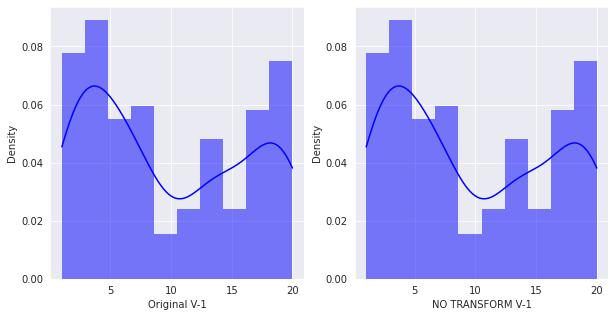


 ------------------------------------------------------

 'V-2' had 'positive' skewness of 3.99

 Transformation yielded skewness of 0.01


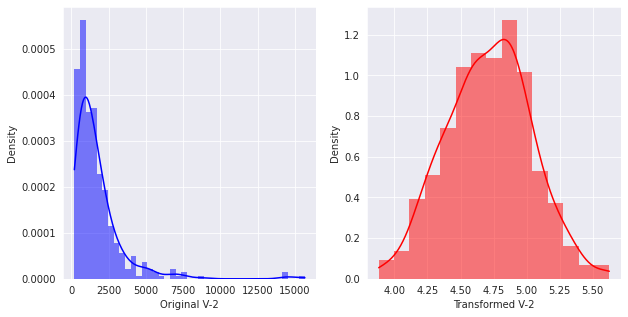


 ------------------------------------------------------

 'V-3' had 'positive' skewness of 5.67

 Transformation yielded skewness of -0.00


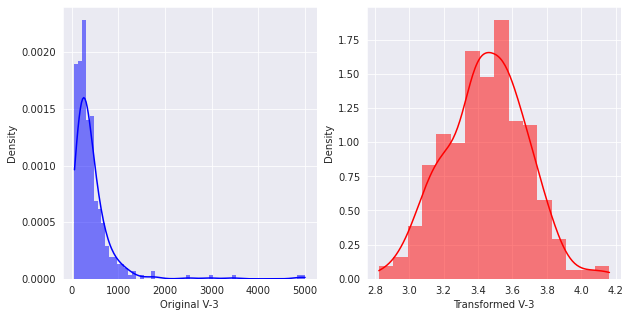


 ------------------------------------------------------

 'V-4' had 'positive' skewness of 6.51

 Transformation yielded skewness of -0.00


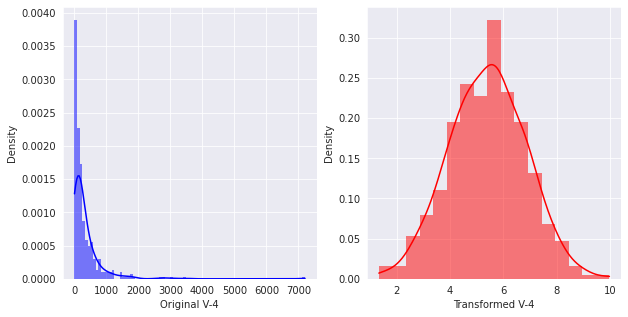


 ------------------------------------------------------

 'V-5' had 'positive' skewness of 1.14

 Transformation yielded skewness of -0.04


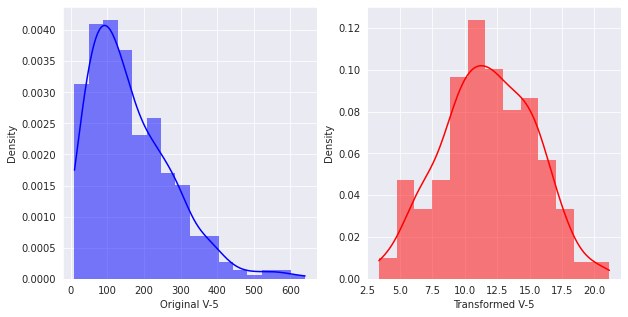


 ------------------------------------------------------

 'V-6' had 'positive' skewness of 4.60

 Transformation yielded skewness of -0.02


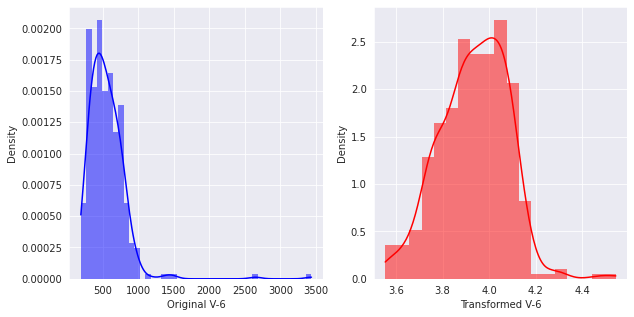


 ------------------------------------------------------

 'V-7' had 'positive' skewness of 2.44

 Transformation yielded skewness of -0.01


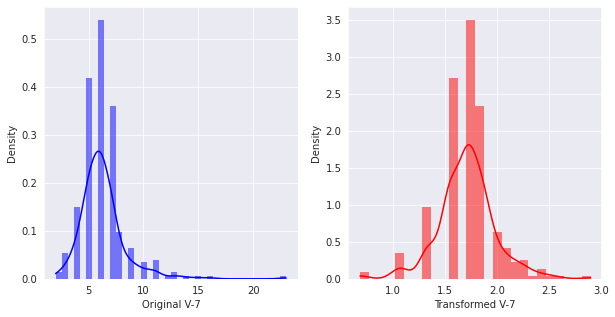


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V-11' . Skewness = 0.81


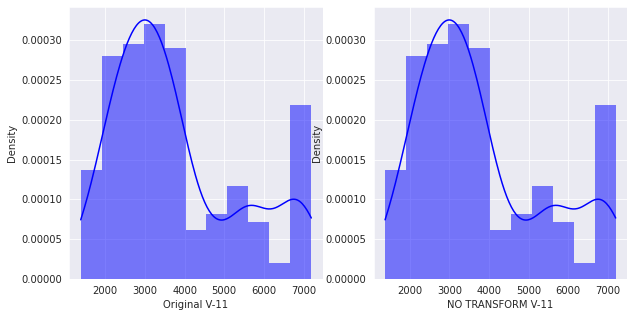


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V-12' . Skewness = 0.78


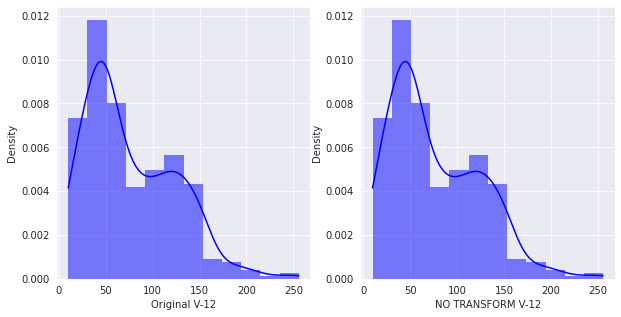


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V-13' . Skewness = 0.47


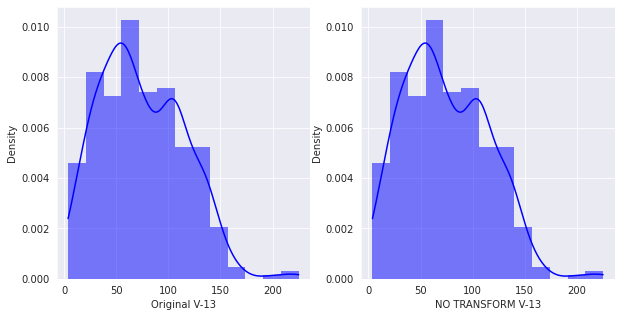


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V-14' . Skewness = 0.86


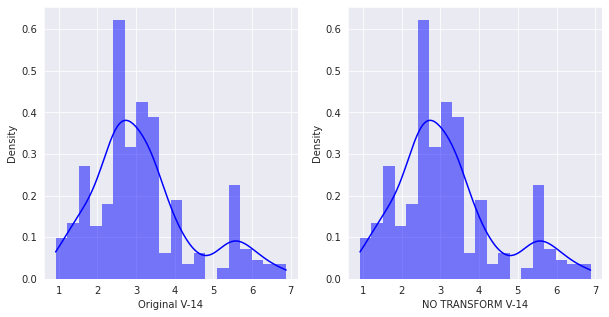


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V-15' . Skewness = 0.96


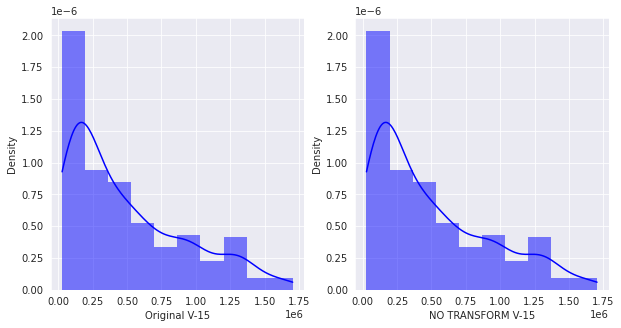


 ------------------------------------------------------

 'V-16' had 'positive' skewness of 1.78

 Transformation yielded skewness of -0.03


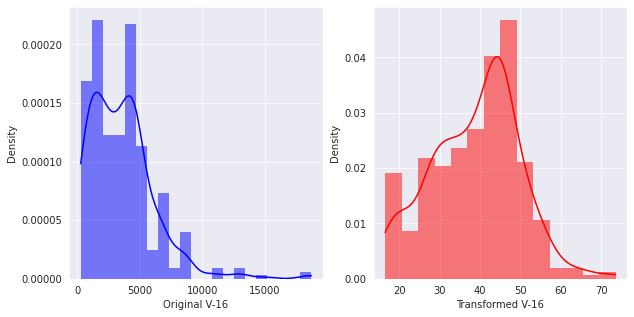


 ------------------------------------------------------

 'V-17' had 'positive' skewness of 1.20

 Transformation yielded skewness of -0.05


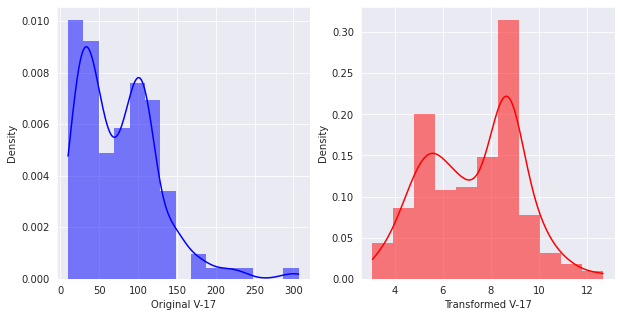


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V-18' . Skewness = 0.74


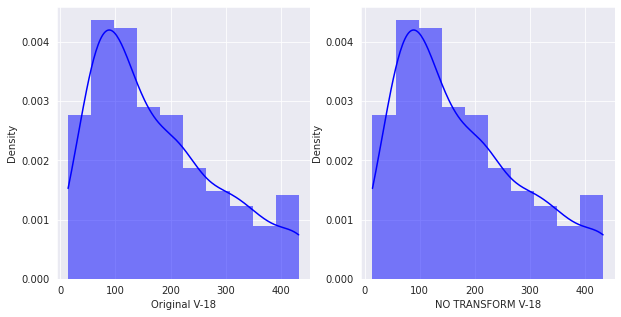


 ------------------------------------------------------

 'V-19' had 'positive' skewness of 1.88

 Transformation yielded skewness of -0.03


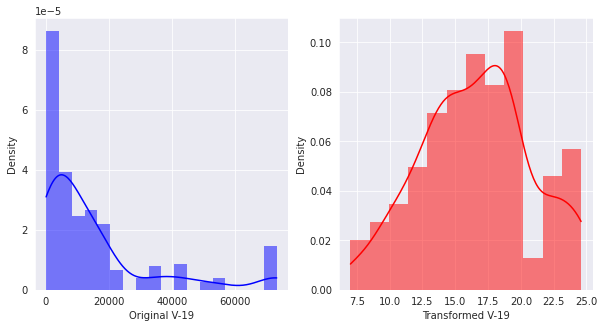


 ------------------------------------------------------

 'V-20' had 'negative' skewness of -2.23

 Transformation yielded skewness of -0.99


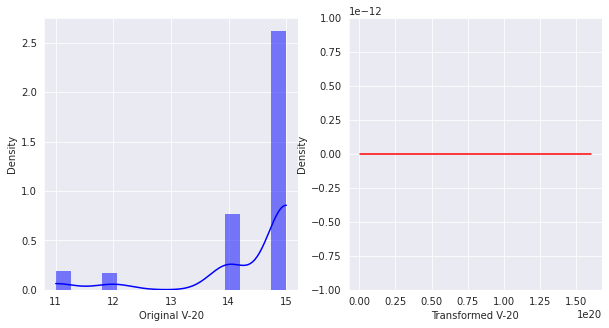


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V-21' . Skewness = 0.73


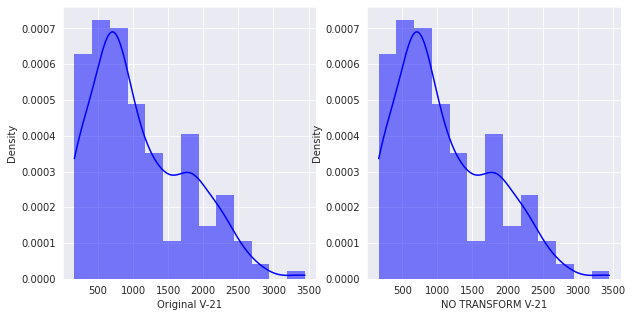


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V-22' . Skewness = 0.85


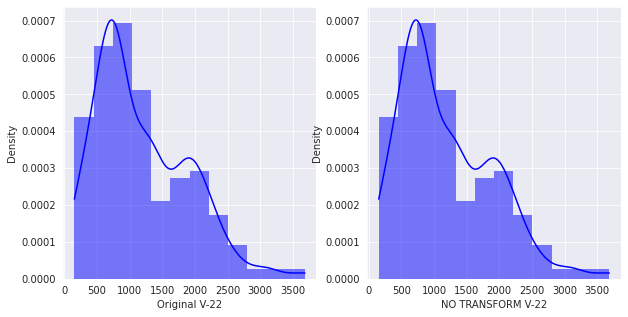


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V-23' . Skewness = -0.06


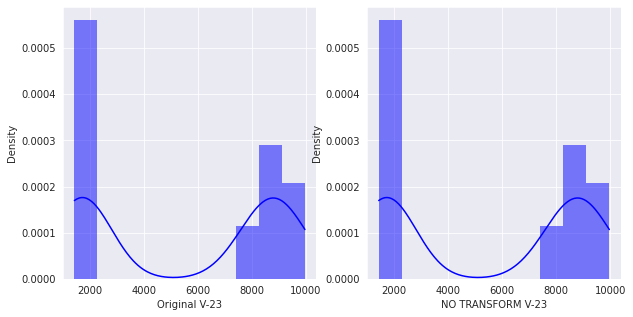


 ------------------------------------------------------

 'V-24' had 'negative' skewness of -1.34

 Transformation yielded skewness of -0.76


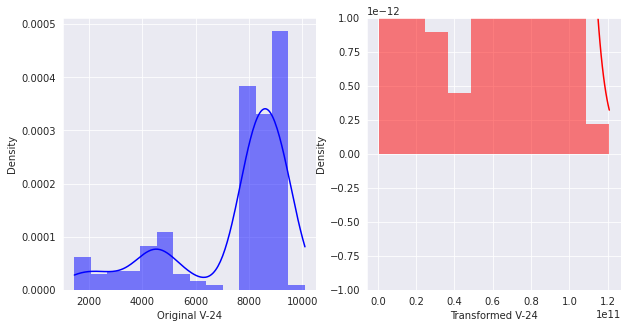


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V-25' . Skewness = 0.20


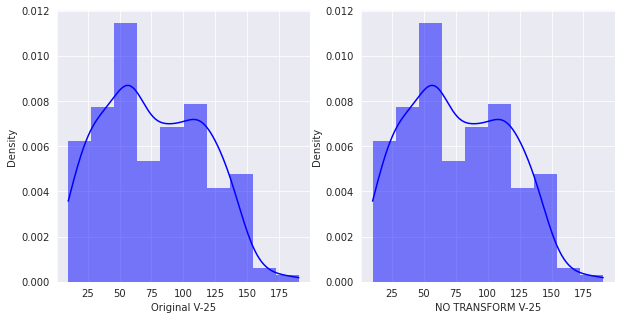


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V-26' . Skewness = 0.31


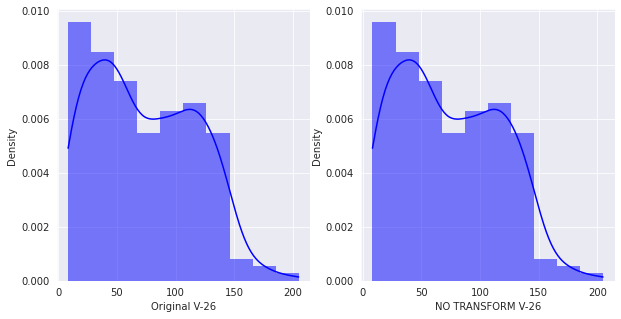


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V-27' . Skewness = 0.25


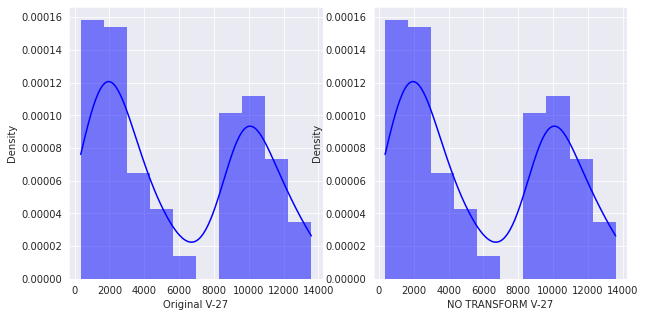


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V-28' . Skewness = 0.07


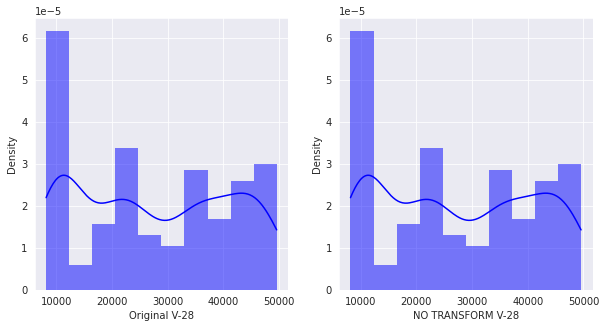


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'V-29' . Skewness = 0.80


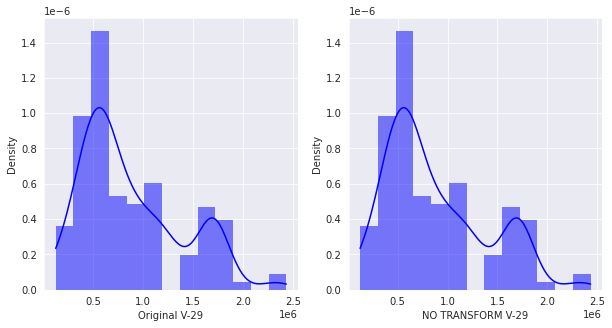


 ------------------------------------------------------

 'V-9' had 'positive' skewness of 1.88

 Transformation yielded skewness of -0.00


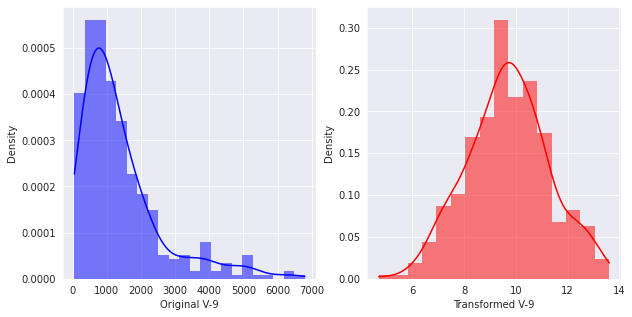


 ------------------------------------------------------

 'V-10' had 'positive' skewness of 1.26

 Transformation yielded skewness of -0.03


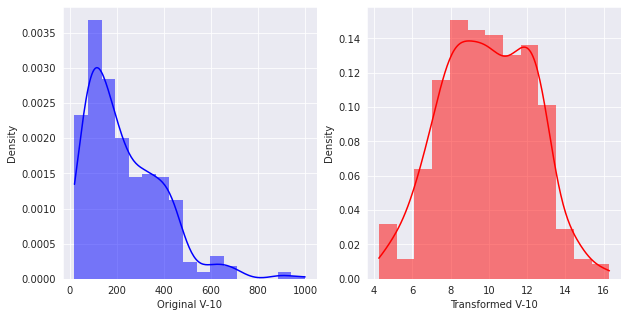

In [ ]:
# Use code above (adapted from https://github.com/datamadness/Automatic-skewness-transformation-for-Pandas-DataFrame) to correct skewness
# All the predictors are real-valued, so we can push them all through the skewness check/correction.
X = skew_autotransform(X.copy(deep=True), plot = True, exp = False, threshold = 1)

#**Pre-processing-Outliers**

In [ ]:
# Tukey Rule outliers
# As an alternative, you could use z-scores greater than 3 or less than -3.

cols = X.columns
#Tukey's method
def tukey_rule(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_lim = data[col].quantile(0.5) + 2 * IQR
    lower_lim = data[col].quantile(0.5) - 2 * IQR
    outliers = []
    for index, x in enumerate(data[col]):
        if x < lower_lim or x >= upper_lim:
            outliers.append(index)
    return outliers

# Identify outliers
for i in cols:
  outliers_Tukey = tukey_rule(X,i)
  print("Column ",i,": ",outliers_Tukey)
  
# Windsorize X and check the results
print("Before", X.describe())
X_winsorized = X.copy(deep=True)
for i in cols:
  X_winsorized[i] = winsorize(X[i], limits=(0.05, 0.05))
print("After", X_winsorized.describe())

Column  V-1 :  []
Column  V-2 :  [17]
Column  V-3 :  [17, 339, 341]
Column  V-4 :  [17, 257, 274]
Column  V-5 :  []
Column  V-6 :  [31, 58, 274, 321]
Column  V-7 :  [0, 1, 2, 4, 5, 9, 12, 34, 39, 43, 59, 94, 95, 101, 121, 135, 157, 188, 271, 296, 348, 364]
Column  V-11 :  []
Column  V-12 :  [62, 97, 342]
Column  V-13 :  [62, 97, 342]
Column  V-14 :  [0, 7, 25, 35, 36, 37, 43, 53, 61, 62, 83, 86, 92, 94, 113, 117, 119, 126, 130, 139, 151, 154, 156, 157, 161, 170, 172, 181, 188, 189, 203, 207, 213, 218, 219, 224, 243, 246, 252, 261, 266, 281, 291, 334, 338, 339, 342, 358, 368]
Column  V-15 :  [7, 61, 62, 86, 97, 342]
Column  V-16 :  [97, 342]
Column  V-17 :  []
Column  V-18 :  []
Column  V-19 :  []
Column  V-20 :  []
Column  V-21 :  [7, 61, 62, 86, 97, 342]
Column  V-22 :  [62, 97, 342]
Column  V-23 :  []
Column  V-24 :  []
Column  V-25 :  []
Column  V-26 :  []
Column  V-27 :  []
Column  V-28 :  []
Column  V-29 :  [7, 61, 62, 86, 97, 342]
Column  V-9 :  [310]
Column  V-10 :  []
Before   

In [ ]:
# Update result df with winzorized quant featires

def windorized(self):
  for ls in self:
    df[ls]=X_winsorized[ls]

lists = ['V-1','V-2','V-3','V-4','V-5','V-6','V-7','V-9','V-10','V-11',
           'V-12','V-13','V-14','V-15','V-16','V-17','V-18','V-19','V-20','V-21','V-22',
           'V-23','V-24','V-25','V-26','V-27','V-28','V-29']

windorized(lists)

In [ ]:
#Review columns
df.columns

Index(['V-1', 'V-2', 'V-3', 'V-4', 'V-5', 'V-6', 'V-7', 'V-11', 'V-12', 'V-13',
       'V-14', 'V-15', 'V-16', 'V-17', 'V-18', 'V-19', 'V-20', 'V-21', 'V-22',
       'V-23', 'V-24', 'V-25', 'V-26', 'V-27', 'V-28', 'V-29', 'V-9', 'V-10'],
      dtype='object')

In [ ]:
X=df.drop(['V-9'],axis=1)
y=df['V-9']

#Scaling & Holdout Sample

In [ ]:
# Create holdout sample
# Note: split before doing any trasformations on the data!!!

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.2,    # 80-20 training vs test set split
                     random_state=0)
print('Shape of X and y',X.shape, y.shape, '\nShape of training set X and y',X_train.shape, y_train.shape, '\nShape of test set X and y',X_test.shape, y_test.shape) 
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)


Shape of X and y (372, 27) (372,) 
Shape of training set X and y (297, 27) (297,) 
Shape of test set X and y (75, 27) (75,)


In [ ]:
# Bringing features onto the same scale：normalization and standardization:

# Min-max scaling(Normalization) (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

# mms = MinMaxScaler()
# X_norm = mms.fit_transform(X)

# Standardization z-score  (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)
# from sklearn.preprocessing import StandardScaler
stdsc1 = StandardScaler()  
X_train_std = stdsc1.fit_transform(X_train)
X_test_std = stdsc1.transform(X_test)
stdsc2 = StandardScaler()  
y_train_std = stdsc2.fit_transform(y_train)
y_test_std = stdsc2.transform(y_test)

#PCA

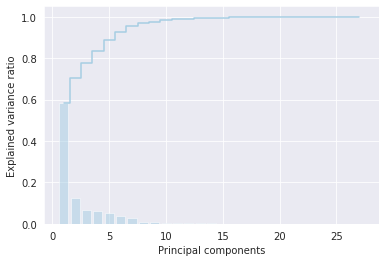

In [ ]:
# Principal Components Analysis
# Examine the explained variance ratio in order for each components
pca = PCA()
X_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

plt.bar(range(1, 28), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 28), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

# This shows that the first principal component is very important, but that there are then many components of similar explanatory power
# Accordingly, not much may be gained by using PCA (relative to the original features)

#**Recursive Feature Elimination (RFE)**

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=10)
_ = rfe.fit(X_train_std,y_train_std)
print('Important Features\n',X.columns[rfe.support_])
rf = RandomForestRegressor()
_ = rf.fit(rfe.transform(X_train_std), y_train_std)
print("\n Accuracy: ",rf.score(rfe.transform(X_train_std), y_train_std))

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_rfe.py:283: DataConversionWarning: A column-vector y was passed when a 1d array was expe

Important Features
 Index(['V-1', 'V-2', 'V-4', 'V-5', 'V-6', 'V-19', 'V-24', 'V-27', 'V-29',
       'V-10'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys



 Accuracy:  0.9739219458567037


In [ ]:
X_imp=df[['V-1', 'V-2', 'V-4', 'V-5', 'V-6', 'V-19', 'V-24', 'V-27', 'V-29','V-10']]
y_imp=df['V-9']

In [ ]:
# Create holdout sample
# Note: split before doing any trasformations on the data!!!

X_imp_train, X_imp_test, y_imp_train, y_imp_test =\
    train_test_split(X_imp, y_imp, 
                     test_size=0.2,    # 80-20 training vs test set split
                     random_state=0)
print('Shape of X and y',X_imp.shape, y_imp.shape, '\nShape of training set X and y',X_imp_train.shape, y_imp_train.shape, '\nShape of test set X and y',X_imp_test.shape, y_imp_test.shape) 
y_imp_train = pd.DataFrame(y_imp_train)
y_imp_test = pd.DataFrame(y_imp_test)

Shape of X and y (372, 10) (372,) 
Shape of training set X and y (297, 10) (297,) 
Shape of test set X and y (75, 10) (75,)


In [ ]:
# Bringing features onto the same scale：normalization and standardization:

# Min-max scaling(Normalization) (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

# mms = MinMaxScaler()
# X_norm = mms.fit_transform(X)

# Standardization z-score  (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)
# from sklearn.preprocessing import StandardScaler
stdsc1 = StandardScaler()  
X_imp_train_std = stdsc1.fit_transform(X_imp_train)
X_imp_test_std = stdsc1.transform(X_imp_test)
stdsc2 = StandardScaler()  
y_imp_train_std = stdsc2.fit_transform(y_imp_train)
y_imp_test_std = stdsc2.transform(y_imp_test)


#**Regressor Development**

In [ ]:
# Regressor Development and Assessment

names = ['Multiple Linear Regression', 'Lasso Regression', 'Ridge Regression','ElasticNet Regression','kNN', 'SVM','Multilayer Perceptron','Random Forest', 'XGBoost', 'AdaBoost','LightGBM']
regressors = [linear_model.LinearRegression(),
              Lasso(alpha=0.5),
              Ridge(alpha=0.5),
              ElasticNet(alpha=0.25, l1_ratio=0.5),
              KNeighborsRegressor(n_neighbors=5),
              SVR(kernel = 'poly'),   #Can try kernels 'poly', 'linear', 'rbf' and 'sigmoid' kernels
              DecisionTreeRegressor(),
              MLPRegressor(hidden_layer_sizes=(50,50,1),
                       max_iter = 300,activation = 'relu',         
                       solver = 'adam'),
              RandomForestRegressor(criterion='squared_error'),
              XGBRegressor(objective ='reg:squarederror'),
              AdaBoostRegressor(loss='square'),
              lgb.LGBMRegressor(objective='mean_squared_error')
              ] 

for name, regr in zip(names, regressors):
  print('REGRESSOR: ',name)
  pipe = Pipeline(steps=[('normalize', MinMaxScaler()), ('model', regr)])
  model = TransformedTargetRegressor(regressor=pipe, transformer=MinMaxScaler())
  cv = KFold(n_splits=10, shuffle=True, random_state=1)
  scores = cross_val_score(model, X_imp, y_imp, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
  score_mean = mean(absolute(scores))
  score_stdev = np.std(scores)
  print('Mean (std Dev) of MSE: %.3f (%.3f)\n' % (score_mean, score_stdev))

REGRESSOR:  Multiple Linear Regression
Mean (std Dev) of MSE: 0.419 (0.090)

REGRESSOR:  Lasso Regression
Mean (std Dev) of MSE: 2.191 (0.371)

REGRESSOR:  Ridge Regression
Mean (std Dev) of MSE: 0.414 (0.092)

REGRESSOR:  ElasticNet Regression
Mean (std Dev) of MSE: 2.191 (0.371)

REGRESSOR:  kNN
Mean (std Dev) of MSE: 0.443 (0.075)

REGRESSOR:  SVM
Mean (std Dev) of MSE: 0.574 (0.188)

REGRESSOR:  Multilayer Perceptron
Mean (std Dev) of MSE: 0.695 (0.192)

REGRESSOR:  Random Forest
Mean (std Dev) of MSE: 9.401 (9.228)

REGRESSOR:  XGBoost
Mean (std Dev) of MSE: 0.380 (0.105)

REGRESSOR:  AdaBoost
Mean (std Dev) of MSE: 0.285 (0.096)

REGRESSOR:  LightGBM
Mean (std Dev) of MSE: 0.422 (0.111)



#**Gridsearch AdaBoost Regressor**

In [ ]:
# Gridsearch the XGBoostRegressor hyperparameter space
model = AdaBoostRegressor(loss='square')
# define the grid of values to search
grid = dict()
grid['loss']= ['linear', 'square', 'exponential']
grid['n_estimators'] = [50,60,100]
grid['learning_rate']=[0.1,0.5,1.0]
cv = RepeatedKFold(n_splits=4, n_repeats=2, random_state=192837465)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='neg_mean_squared_error')
grid_result = grid_search.fit(X_imp, y_imp)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (absolute(mean), stdev, param))

Best: -0.444461 using {'learning_rate': 1.0, 'loss': 'square', 'n_estimators': 50}
0.489910 (0.048379) with: {'learning_rate': 0.1, 'loss': 'linear', 'n_estimators': 50}
0.491645 (0.049939) with: {'learning_rate': 0.1, 'loss': 'linear', 'n_estimators': 60}
0.475766 (0.044227) with: {'learning_rate': 0.1, 'loss': 'linear', 'n_estimators': 100}
0.483344 (0.052318) with: {'learning_rate': 0.1, 'loss': 'square', 'n_estimators': 50}
0.480968 (0.050246) with: {'learning_rate': 0.1, 'loss': 'square', 'n_estimators': 60}
0.472072 (0.042784) with: {'learning_rate': 0.1, 'loss': 'square', 'n_estimators': 100}
0.494535 (0.054846) with: {'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 50}
0.496488 (0.047015) with: {'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 60}
0.474868 (0.048544) with: {'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100}
0.456762 (0.042357) with: {'learning_rate': 0.5, 'loss': 'linear', 'n_estimators': 50}
0.458435 (0.041190) with: {'l

In [ ]:
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_imp, y_imp, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Mean (std Dev) of MSE: %.3f (%.3f)\n' % (score_mean, score_stdev))

Mean (std Dev) of MSE: 0.422 (0.111)



#**Sample Actual vs Predicted Graph**

In [ ]:
# Report performance
def Performance(actuals,predictions):
  print('MSE: %.2f ' % mean_squared_error(actuals, predictions))
 
# Plotting the actuals vs predictions 
def PredsVsActuals(actuals,predictions):
  plt.plot(actuals, predictions, '.', color='blue')
  plt.xlabel('Actuals')
  plt.ylabel('Predictions')
  plt.show()

MSE: 0.48 


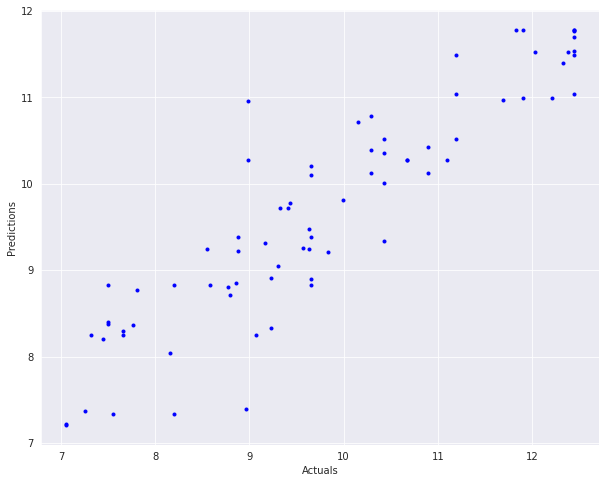

In [ ]:
#Fit XGBRegressor and produce graph and performance results for holdout sample
regr = AdaBoostRegressor(loss='square')
regr.fit(X_imp_train_std, np.ravel(y_imp_train_std))
# Make predictions 
y_imp_pred_std = regr.predict(X_imp_test_std)
y_imp_pred_std = pd.DataFrame(y_imp_pred_std)
y_imp_pred = stdsc2.inverse_transform(y_imp_pred_std)
# Performance
plt.figure(figsize=(10,8))
Performance(y_imp_test,y_imp_pred)
PredsVsActuals(y_imp_test,y_imp_pred)


In [ ]:
# Percentage overprediction
y_imp_pred = pd.DataFrame(y_imp_pred) 
y_imp_test = pd.DataFrame(y_imp_test)
results = pd.concat([y_imp_pred, y_imp_test.set_index(y_imp_pred.index)], axis=1)
results.columns=['Pred','Act']
results['%error'] = 100* (results.Pred - results.Act)/results.Act
results = pd.DataFrame(results)
ovr_pred = 0
for index, instance in results.iterrows():
    if results.at[index,'%error'] > 0:
        ovr_pred = ovr_pred + 1
print('Percentage of instance overpredicted: ',100*ovr_pred/len(results))

Percentage of instance overpredicted:  42.666666666666664


In [ ]:
# Examine actuals, predictions & errors
results.head(10)

,Pred,Act,%error
0,7.396128,8.962348,-17.475551
1,8.822408,9.650948,-8.585066
2,7.364357,7.259424,1.445460
3,11.531813,12.441839,-7.314242
4,9.379454,9.650948,-2.813126
5,11.494873,12.441839,-7.611138
6,10.274895,10.677399,-3.769685
7,8.394751,7.499643,11.935340
8,9.813572,9.997998,-1.844630
9,9.341012,10.430749,-10.447357


#**Conclusions**


First of all, we split the dataset to train and test and do the scaling after that. Then we use PCA and RFE to do the feature selections, which are 'V-1', 'V-2', 'V-4', 'V-5', 'V-6', 'V-19', 'V-24', 'V-27', 'V-29', 'V-10’. 

After that, we know the most ten important variables and drop other relatively non-important columns. Do split and scaling again. So far, we have had a good dataset with less predictors and we run the regression. 

The best model is AdaBoost with the lowest MSE at 0.285. So based on this model, we tune some parameters, such as ‘loss’, ’n_estimators’ and ‘learning_rate’. As a result, we found that the best one with learning_rate at 1, loss at square, and n_estimators at 50. 

Finally we do the K fold cross validation and get the MSE at 0.48. The reason why MSE has increased a little bit is that we divide the dataset into 10 folders so the average of accuracy in each folder might be volatile. To reduce MSE, we can try different folder number later.



